In [335]:
import pandas as pd
import numpy as np 

# %matplotlib inline 
# pd.set_option('display.mpl_style', 'default')

import matplotlib.pyplot as plt
pd.set_option('display.mpl_style', 'default')
%matplotlib inline

In [2]:
def extractCounty(row):
    county_state = row["Geo_NAME"]
    return county_state.split(",")[1].strip()

In [3]:
def extractState(row):
    county_state = row["Geo_NAME"]
    return county_state.split(",")[2].strip()

#2010 ACS Data

In [72]:
df2010 = pd.read_csv("acs_2010.csv", dtype = {'Geo_TRACT': object})

In [73]:
cols = list(df2010.columns[55:])
cols.insert(0,df2010.columns[2])
cols.insert(1,df2010.columns[18])
df_filtered = df2010[cols]

In [74]:
df_filtered.loc[:,'County'] = df_filtered.apply(extractCounty, axis = 1)
df_filtered.loc[:,'State'] = df_filtered.apply(extractState, axis = 1)

In [75]:
acs_2009 = df_filtered

In [76]:
def normalizeRace(row):
    race = float(row['SE_T013_002'])
    total = float(row['SE_T013_001'])
    return (race/total) 

####Convert Race Percentages

In [77]:
acs_2009.iloc[:,2] = acs_2009.iloc[:,2].astype(float)

In [78]:
acs_2009.iloc[:,3] = acs_2009.iloc[:,3]/acs_2009.iloc[:,2]
acs_2009.iloc[:,4] = acs_2009.iloc[:,4]/acs_2009.iloc[:,2]
acs_2009.iloc[:,5] = acs_2009.iloc[:,5]/acs_2009.iloc[:,2]
acs_2009.iloc[:,6] = acs_2009.iloc[:,6]/acs_2009.iloc[:,2]
acs_2009.iloc[:,7] = acs_2009.iloc[:,7]/acs_2009.iloc[:,2]
acs_2009.iloc[:,8] = acs_2009.iloc[:,8]/acs_2009.iloc[:,2]
acs_2009.iloc[:,9] = acs_2009.iloc[:,9]/acs_2009.iloc[:,2]

####Convert Employment

In [79]:
acs_2009.loc[:,'SE_T037_001'] = acs_2009.loc[:,'SE_T037_001'].astype(float) 

In [80]:
acs_2009.loc[:,'SE_T037_002'] = acs_2009.loc[:,'SE_T037_002']/acs_2009['SE_T037_001']
acs_2009.loc[:,'SE_T037_003'] = acs_2009.loc[:,'SE_T037_003']/acs_2009['SE_T037_001']

In [81]:
acs_2009.loc[:,'SE_T095_001'] = acs_2009.loc[:,'SE_T095_001'].astype(float)

In [82]:
acs_2009.loc[:,'SE_T095_002'] = acs_2009.loc[:,'SE_T095_002'] / acs_2009.loc[:,'SE_T095_001']
acs_2009.loc[:,'SE_T095_003'] = acs_2009.loc[:,'SE_T095_003'] / acs_2009.loc[:,'SE_T095_001']

In [83]:
acs_2009.loc[:,'SE_T096_001'] = acs_2009.loc[:,'SE_T096_001'].astype(float)

In [84]:
acs_2009.loc[:,'SE_T096_002'] = acs_2009.loc[:,'SE_T096_002'] / acs_2009.loc[:,'SE_T096_001']
acs_2009.loc[:,'SE_T096_003'] = acs_2009.loc[:,'SE_T096_003'] / acs_2009.loc[:,'SE_T096_001']
acs_2009.loc[:,'SE_T096_004'] = acs_2009.loc[:,'SE_T096_004'] / acs_2009.loc[:,'SE_T096_001']

In [85]:
acs_2009.loc[:,'SE_T098_001'] = 2010 - acs_2009.loc[:,'SE_T098_001']

In [86]:
acs_2009.drop(['SE_T013_001', 'SE_T037_001',   'SE_T147_001', 'SE_T095_001', 'SE_T096_001', 'SE_T147_001'], axis = 1, inplace = True)

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


#2013 ACS Data

In [8]:
df2013 = pd.read_csv("acs_2013.csv", dtype = {'Geo_TRACT': object})

In [9]:
cols = list(df2013.columns[55:])
cols.insert(0,df2013.columns[2])
cols.insert(1,df2013.columns[18])
df2013 = df2013[cols]

In [10]:
acs_2013 = df2013.drop(['SE_T145_001', 'SE_T145_002', 'SE_T145_003', 'SE_T145_004', 'SE_T145_005'], axis=1)

In [11]:
acs_2013.loc[:,('County')] = acs_2013.apply(extractCounty, axis = 1)
acs_2013.loc[:,('State')] = acs_2013.apply(extractState, axis = 1)

####Spark Data

In [248]:
n = 0 

msa_list = [] 
for observation in open("msaCluster_more_features2.txt"): 
    li = [] 
    msa = eval(observation)
    li.extend(msa[0])
    li.extend(msa[1])
    msa_list.append(li)

In [249]:
attribute_names = ['year', 'state', 'msa', 'county', 'census_tract', 'census_tract_pop', 'census_tract_min_pop', \
               'owner_occupied', 'msa_median_inc', 'loan_amount', 'income', 'ratio', 'count', 'one_to_four_family_homes', \
               'Owner-occupied_as_a_principal dwelling', 'Not_owner-occupied_as_a_principal dwelling', \
               'Owner-Occupancy_NA', 'Refinancing', 'Home_Purchases', 'Loan_Purpose_NA', 'Male', 'Female', \
               'White', 'Black', 'Asian', 'Other_Race', 'Loan_Originated', 'Application_denied', \
               'Loan_purchased_by_the_institution', 'Application_Withdrawn', 'Application_Approved_Not_Accepted', \
               'Preapproval_Denied', 'Preapproval_Accepted_Not_Accepted', 'Loan_Origination_NA']

In [250]:
msa = pd.DataFrame(msa_list)

In [251]:
def normalizeLoanAmount(row):
    loan = row[9]
    count = float(row[12])
    return (loan/count)

In [252]:
def normalizeIncome(row):
    income = row[10]
    count = float(row[12])
    return (income/count)

In [253]:
def normalizeRatio(row):
    ratio = row[11]
    count = float(row[12])
    return (ratio/count)

In [254]:
def normalizeHomes(row):
    homes = row[13]
    count = float(row[12])
    return (homes/count)

In [255]:
msa.loc[:,(9)] = msa.apply(normalizeLoanAmount, axis = 1)
msa.loc[:,(10)] = msa.apply(normalizeIncome, axis = 1)
msa.loc[:,(11)] = msa.apply(normalizeRatio, axis = 1)
msa.loc[:,(13)] = msa.apply(normalizeHomes, axis = 1)

In [256]:
msa_2007 = msa[msa[0] == '2007']

In [257]:
def cleanCT(row):
    ct = row[4]
    return ct.replace(".", "")

In [258]:
msa_2007.loc[:,4] = msa_2007.apply(cleanCT, axis = 1)

In [259]:
print len(msa_2007)
print len(acs_2009)

53056
74002


In [287]:
len(testMerge)

43201

In [260]:
testMerge = pd.merge(msa_2007, acs_2009, left_on = [3, 4], right_on = ['County', 'Geo_TRACT'])

In [261]:
Census_Tracts_Store = testMerge[[0, 1, 2, 3, 4]]

In [262]:
testMerge.drop(['Geo_TRACT', 'Geo_NAME', 'County', 'State', 0,1,2,3,4], axis = 1, inplace = True)

In [263]:
testMerge = testMerge.dropna()

In [264]:
X = testMerge.values

In [290]:
X

array([[  1.98800000e+03,   1.95699997e+01,   5.33000000e+02, ...,
          5.20000000e+01,   1.17000000e+05,   7.90000000e+02],
       [  2.08200000e+03,   6.15000010e+00,   5.50000000e+02, ...,
          4.20000000e+01,   1.83900000e+05,   8.75000000e+02],
       [  3.83100000e+03,   9.21000004e+00,   7.21000000e+02, ...,
          6.10000000e+01,   8.01000000e+04,   6.32000000e+02],
       ..., 
       [  1.88200000e+03,   9.65500031e+01,   2.06000000e+02, ...,
          4.30000000e+01,   5.98900000e+05,   1.13100000e+03],
       [  7.32700000e+03,   9.29300003e+01,   1.00000000e+02, ...,
          7.10000000e+01,   9.03800000e+05,   9.47000000e+02],
       [  5.12900000e+03,   2.87600002e+01,   1.41000000e+03, ...,
          1.70000000e+01,   2.46700000e+05,   1.01900000e+03]])

####K-Means Clustering

In [123]:
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from datetime import datetime
import matplotlib.pyplot as plt

In [307]:
data = scale(X)

In [267]:
n_samples, n_features = data.shape

In [268]:
clusters = [2,3,4,5,6,7,8,9,10]

In [269]:
wss = []

In [270]:
startTime = datetime.now()
print startTime
for count in clusters: 
    estimator = KMeans(n_clusters = count)
    estimator.fit(data)
    wss_num = estimator.inertia_
    wss.append(wss_num)
    
print np.diff(wss)
print datetime.now() - startTime

2015-07-28 21:58:28.364657
[-154070.50179272 -107561.68797606  -89278.37208371  -53510.91135216
  -53208.32274351  -37400.73658072  -31656.8095112   -29349.65860909]
0:02:00.447844


In [147]:
from scipy import stats
import numpy as np

In [144]:
x = [1,2,3,4]

In [155]:
y = wss[1:5]

In [156]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [157]:
slope

-83453.072239825851

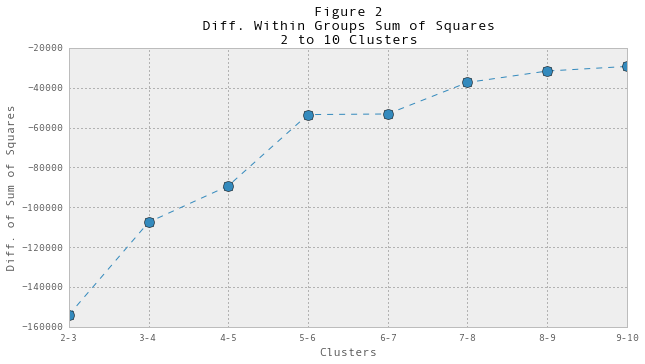

In [305]:
xlabels = ['2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10']
fig, ax = plt.subplots(figsize = (10,5))
plt.plot([3,4,5,6,7,8,9,10], np.diff(wss), '--o', markersize = 10)
ax.set_title("Figure 2\nDiff. Within Groups Sum of Squares\n2 to 10 Clusters")
ax.set_ylabel("Diff. of Sum of Squares")
ax.set_xlabel("Clusters")
ax.set_xticklabels(xlabels)

In [273]:
np.diff(wss)

array([-154070.50179272, -107561.68797606,  -89278.37208371,
        -53510.91135216,  -53208.32274351,  -37400.73658072,
        -31656.8095112 ,  -29349.65860909])

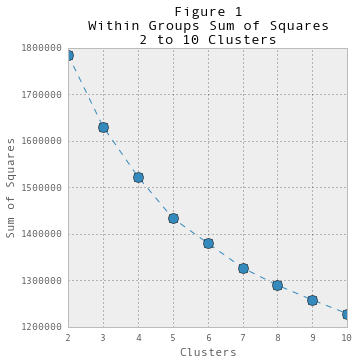

In [297]:
fig, ax = plt.subplots(figsize = (5,5))
plt.plot([2,3,4,5,6,7,8,9,10], wss, '--o', markersize = 10)
ax.set_title("Figure 1\nWithin Groups Sum of Squares\n2 to 10 Clusters")
ax.set_ylabel("Sum of Squares")
ax.set_xlabel("Clusters")

####Based on the elbow method, it appears 6 clusters might be the optimal amount to group by. 

In [403]:
estimator = KMeans(n_clusters = 5)
estimator.fit(data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

In [404]:
centroids = pd.DataFrame(estimator.cluster_centers_)
centroids_plot = pd.DataFrame(estimator.cluster_centers_)

In [412]:
pd.Series(estimator.labels_).value_counts()

0    15163
4    12221
1     8010
3     5766
2     2041
dtype: int64

In [381]:
18.5 + 13.5 + 28 + 35
# range(2,51)
# 12221.0/43201

95.0

####Plotting of Clusters

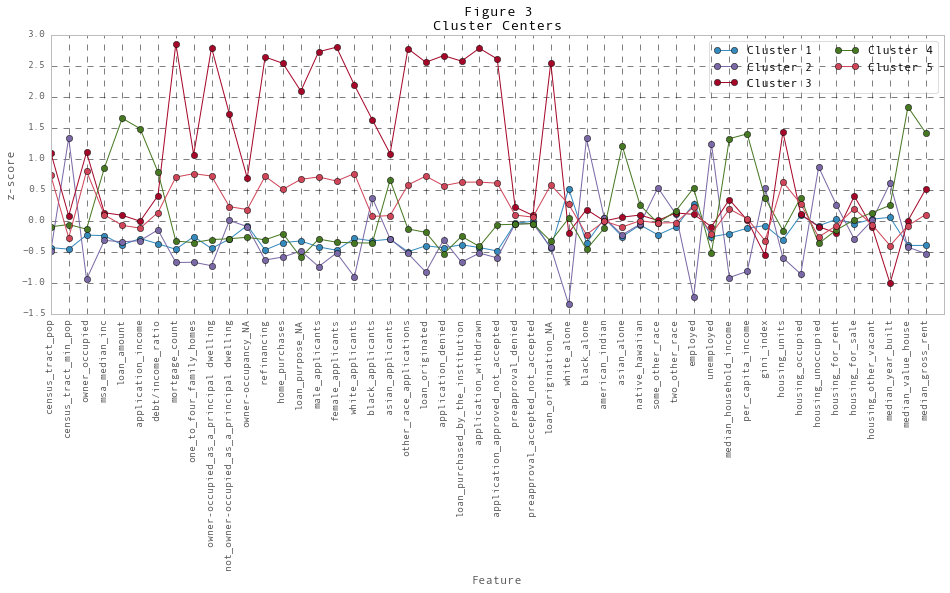

In [411]:
legend = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
fig, ax = plt.subplots(figsize = (16,5))

ax.plot(centroids_plot.transpose(), '-o')
# ax.set_title("Cluster Centers\n")
ax.set_xticks(range(0,50)) 
ax.set_xticklabels(labels1, rotation=90)
ax.grid(b=True, which='major', linestyle='--')
ax.legend(legend, loc = 'upper right', ncol = 2)
ax.set_title("Figure 3\nCluster Centers")
ax.set_ylabel("z-score")
ax.set_xlabel("Feature")

In [414]:
# for col in centroids.columns:
#     centroids[col] = centroids[col].apply(lambda x: (x * nyc_rac_grouped[col].std()) + nyc_rac_grouped[col].mean())
centroids.columns = testMerge.columns

In [415]:
for col in centroids:
    centroids[col] = centroids[col].apply(lambda x: (x * testMerge[col].std()) + testMerge[col].mean())

In [416]:
centroids.columns = labels1

In [421]:
final = centroids.transpose()
final.columns = [1,2,3,4,5]

In [422]:
final

,1,2,3,4,5
census_tract_pop,3437.838660,3350.175557,5884.622402,3973.660460,5299.420150
census_tract_min_pop,20.281262,77.377257,37.440327,32.964354,26.126048
owner_occupied,869.614595,492.109293,1576.831337,920.410694,1416.051112
msa_median_inc,59787.968627,58832.687960,64368.219807,73376.518321,63948.159716
loan_amount,134.683029,141.950340,203.179088,426.923381,179.959721
application_income,81.920229,79.523934,101.261706,204.808571,93.540491
debt/income_ratio,2.078668,2.227679,2.592011,2.844226,2.412257
mortgage_count,220.062012,171.100571,981.888524,250.439111,487.490856
one_to_four_family_homes,1196.880068,948.726648,1991.860399,1139.503244,1808.352614
owner-occupied_as_a_principal dwelling,199.814030,140.416927,890.147495,230.250888,448.632649


In [407]:
testMerge[6].mean()


35.024448507350712

In [408]:
testMerge[6].std()

31.861469703703285

In [409]:
(1.329280 * testMerge[6].std()) + testMerge[6].mean()

77.377262955089407

In [372]:
labels1 = ['census_tract_pop', 'census_tract_min_pop', \
               'owner_occupied', 'msa_median_inc', 'loan_amount', 'application_income', 'debt/income_ratio', \
               'mortgage_count', 'one_to_four_family_homes', \
               'owner-occupied_as_a_principal dwelling', 'not_owner-occupied_as_a_principal dwelling', \
               'owner-occupancy_NA', 'refinancing', 'home_purchases', 'loan_purpose_NA', 'male_applicants', 
               'female_applicants', \
               'white_applicants', 'black_applicants', 'asian_applicants', 'other_race_applications', \
               'loan_originated', 'application_denied', \
               'loan_purchased_by_the_institution', 'application_withdrawn', 'application_approved_not_accepted', \
               'preapproval_denied', 'preapproval_accepted_not_accepted', 'loan_origination_NA', 
               'white_alone', \
               'black_alone', 
               'american_indian', 
               'asian_alone', 
               'native_hawaiian', 
               'some_other_race', 
               'two_other_race', \
               'employed', 
               'unemployed', 
               'median_household_income', 
               'per_capita_income', 
               'gini_index', 
               'housing_units', \
               'housing_occupied', 
               'housing_unoccupied', 
               'housing_for_rent', 
               'housing_for_sale', 
               'housing_other_vacant', 
               'median_year_built', \
               'median_value_house', 
               'median_gross_rent']

In [184]:
acs_2009.head().columns

Index([u'Geo_NAME', u'Geo_TRACT', u'SE_T013_002', u'SE_T013_003', u'SE_T013_004', u'SE_T013_005', u'SE_T013_006', u'SE_T013_007', u'SE_T013_008', u'SE_T037_002', u'SE_T037_003', u'SE_T057_001', u'SE_T083_001', u'SE_T146_001', u'SE_T093_001', u'SE_T095_002', u'SE_T095_003', u'SE_T096_002', u'SE_T096_003', u'SE_T096_004', u'SE_T098_001', u'SE_T101_001', u'SE_T104_001', u'County', u'State'], dtype='object')

In [413]:
centroids.transpose()

,0,1,2,3,4
0,-0.436368,-0.491214,1.094436,-0.101137,0.728311
1,-0.462728,1.329280,0.075824,-0.064658,-0.279284
2,-0.235614,-0.948449,1.099807,-0.139697,0.796209
3,-0.243898,-0.320798,0.124813,0.849982,0.090998
4,-0.394368,-0.343549,0.084607,1.649192,-0.077760
5,-0.290715,-0.325274,-0.011783,1.481517,-0.123134
6,-0.376021,-0.150476,0.400977,0.782731,0.128901
7,-0.464031,-0.677120,2.851574,-0.331825,0.699867
8,-0.260773,-0.673298,1.060786,-0.356155,0.755727
9,-0.450725,-0.729448,2.788694,-0.307898,0.716867
